<a href="https://colab.research.google.com/github/krisibraynova01/HISB/blob/main/Graduation_thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import missingno as msno
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.dates import DateFormatter, MonthLocator

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep = '\t')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [5]:
df.shape

(2240, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [8]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [9]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<Axes: >

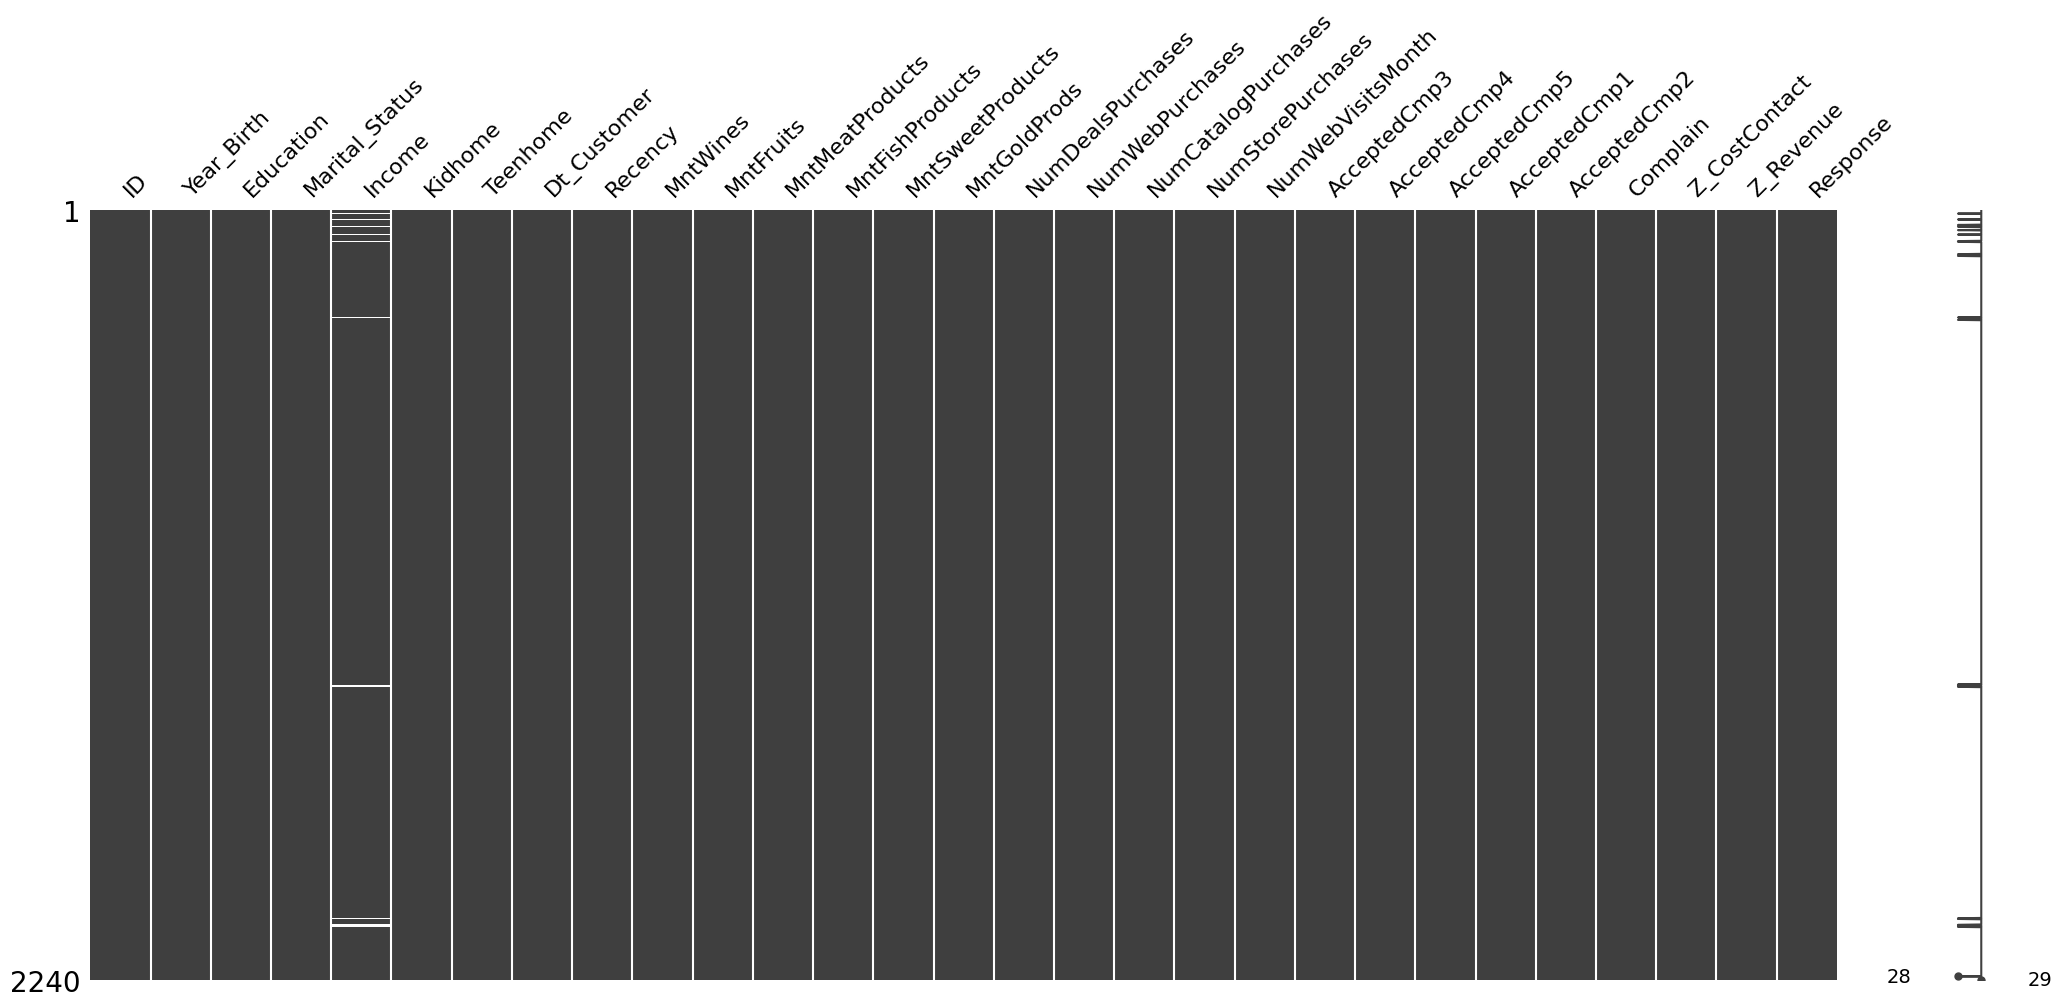

In [10]:
msno.matrix(df)

In [11]:
total_cells = df.shape[0]
total_missing = df.isna().sum()
percent_missing = (total_missing/total_cells)*100
print(f"{round(percent_missing,2)}")

ID                     0.00
Year_Birth             0.00
Education              0.00
Marital_Status         0.00
Income                 1.07
Kidhome                0.00
Teenhome               0.00
Dt_Customer            0.00
Recency                0.00
MntWines               0.00
MntFruits              0.00
MntMeatProducts        0.00
MntFishProducts        0.00
MntSweetProducts       0.00
MntGoldProds           0.00
NumDealsPurchases      0.00
NumWebPurchases        0.00
NumCatalogPurchases    0.00
NumStorePurchases      0.00
NumWebVisitsMonth      0.00
AcceptedCmp3           0.00
AcceptedCmp4           0.00
AcceptedCmp5           0.00
AcceptedCmp1           0.00
AcceptedCmp2           0.00
Complain               0.00
Z_CostContact          0.00
Z_Revenue              0.00
Response               0.00
dtype: float64


In [12]:
df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


Text(0, 0.5, 'Income')

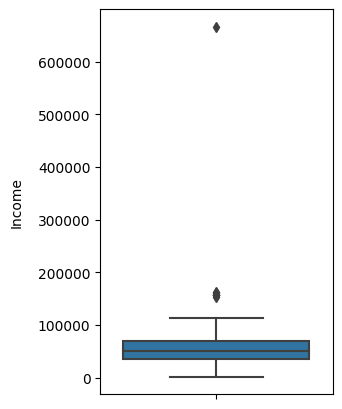

In [13]:
plt.figure(figsize=(3,5))
sns.boxplot(y=df['Income'])
plt.ylabel('Income', fontsize=10, labelpad=10)

<ipython-input-14-332167f08bea>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'])


<Axes: xlabel='Income', ylabel='Density'>

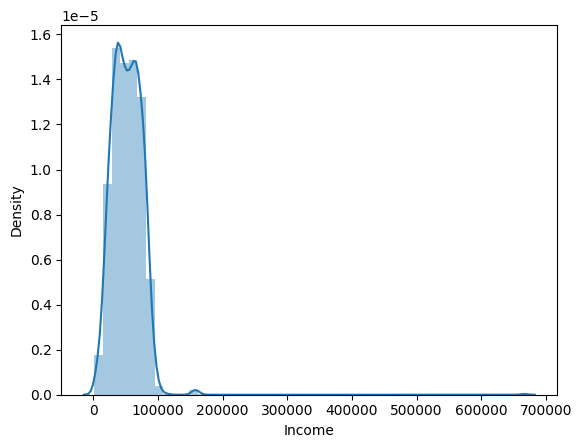

In [14]:
sns.distplot(df['Income'])

In [15]:
df['Income'] = df['Income'].fillna(df['Income'].median())

In [16]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [17]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

In [18]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [19]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [20]:
df['Year_Birth'].value_counts()

1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64

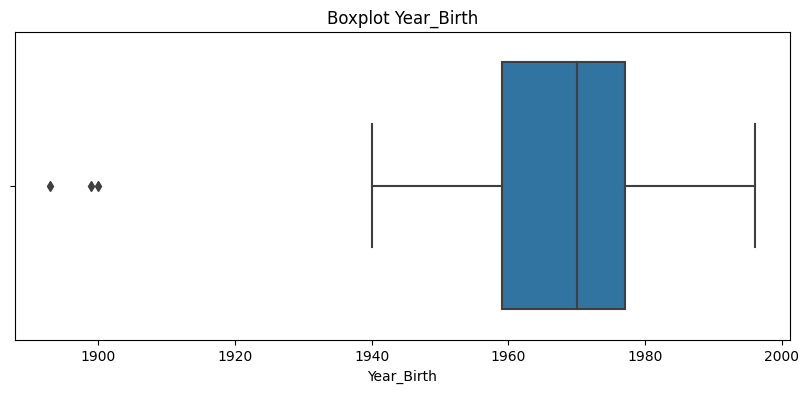

In [21]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df,x='Year_Birth')
plt.title("Boxplot Year_Birth");

In [22]:
quartile1 = df['Year_Birth'].quantile(0.25)
quartile3 = df['Year_Birth'].quantile(0.75)
interquantile_range = quartile3 - quartile1
low_outlier = quartile1 - 1.5 * interquantile_range
print(f"The low outlier is : {int(low_outlier)}")

The low outlier is : 1932


In [23]:
low_out = df[df['Year_Birth'] < low_outlier]
low_out

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,1,0,0,1,0,0,0,3,11,0


In [24]:
df = df.drop(low_out.index)

In [25]:
pd.to_datetime(df['Dt_Customer'])

<ipython-input-25-73c49ae9f4e0>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pd.to_datetime(df['Dt_Customer'])


0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2237, dtype: datetime64[ns]

In [26]:
print(max(df['Dt_Customer']))

31-12-2013


In [27]:
print(min(df['Dt_Customer']))

01-01-2013


In [28]:
df['Age'] = 2014 - df['Year_Birth']

Text(0, 0.5, 'Counts')

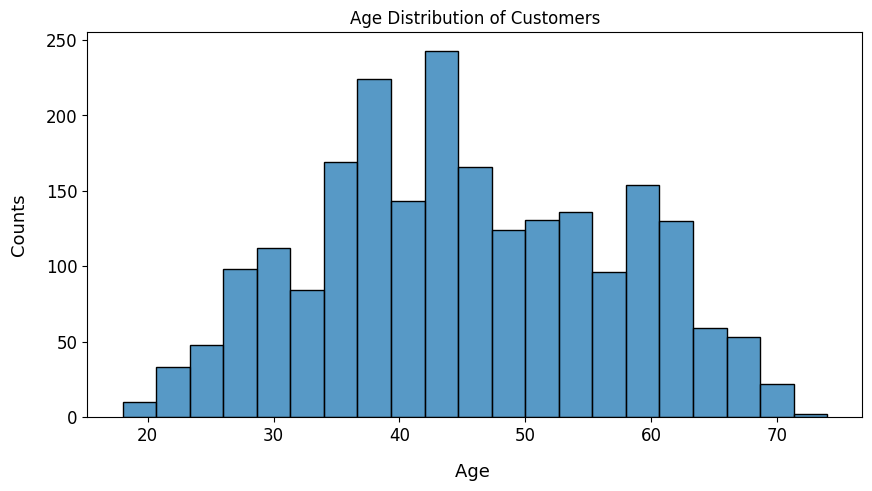

In [29]:
plt.figure(figsize=(10,5))
distr_of_age = sns.histplot(data = df, x = df['Age'])
distr_of_age.set(title = "Age Distribution of Customers");
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('Age ', fontsize=13, labelpad=13)
plt.ylabel('Counts', fontsize=13, labelpad=13)

In [30]:
def age_group(age):
  if age >= 18 and age < 25:
    return 'Young'
  elif age >= 25 and age <= 39:
    return 'Young Adults'
  elif age >= 40 and age <= 59:
    return 'Middle-Aged Adults'
  elif age >= 60:
    return 'Old Adults'

In [31]:
df['Age Group'] = df['Age'].apply(age_group)

Text(0.5, 1.0, 'Proportion of Age Group')

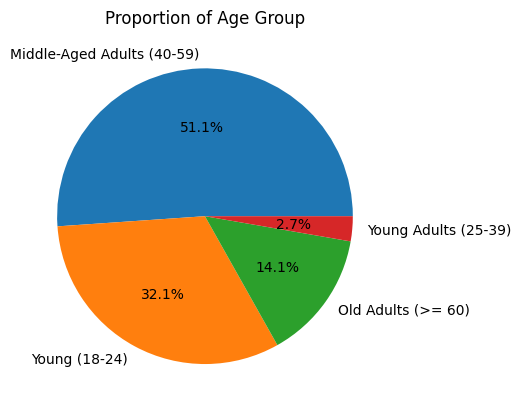

In [32]:
mylabels = ["Middle-Aged Adults (40-59)", "Young (18-24)", "Old Adults (>= 60)", "Young Adults (25-39)"]

plt.pie(df['Age Group'].value_counts(), labels = mylabels, autopct='%1.1f%%',
        wedgeprops = {'linewidth': 3})
plt.title('Proportion of Age Group')

In [33]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [34]:
df['Education'].value_counts()

Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: Education, dtype: int64

<Figure size 500x800 with 0 Axes>

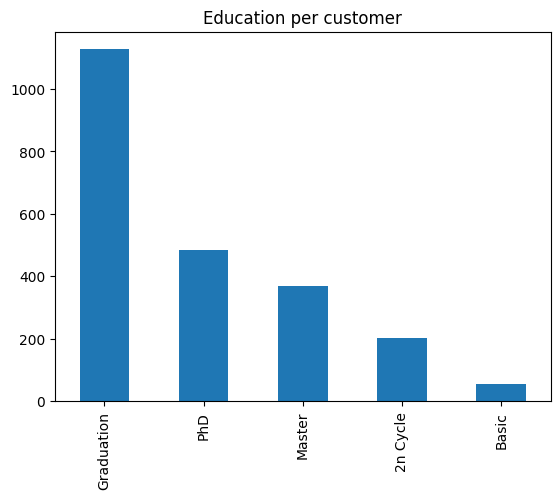

<Figure size 500x800 with 0 Axes>

In [35]:
df['Education'].value_counts().plot(kind='bar',linewidth = 3)
plt.title('Education per customer')
plt.figure(figsize=(5,8))

In [36]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [37]:
df['Marital_Status'].value_counts()

Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

<Figure size 500x800 with 0 Axes>

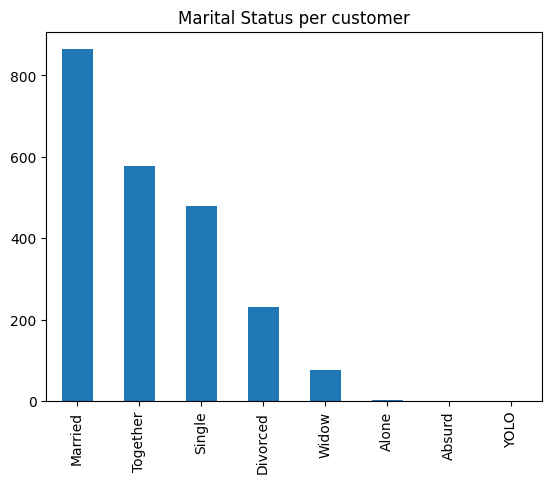

<Figure size 500x800 with 0 Axes>

In [38]:
df['Marital_Status'].value_counts().plot(kind='bar',linewidth = 3)
plt.title('Marital Status per customer')
plt.figure(figsize=(5,8))

Text(0.5, 0, 'Income')

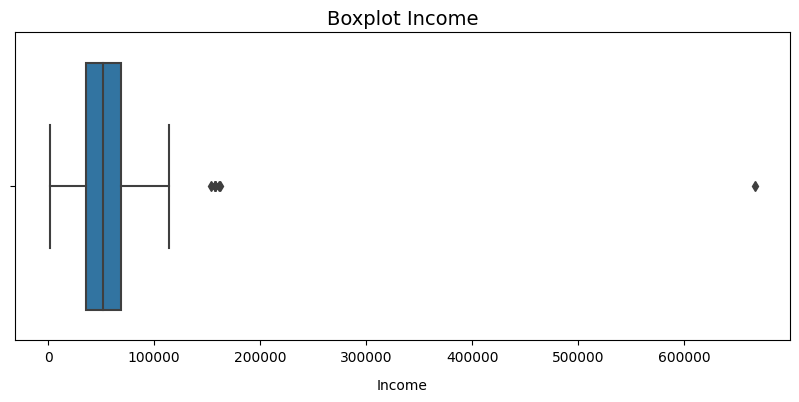

In [39]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df,x='Income')
plt.title("Boxplot Income",size=14)
plt.xlabel('Income', fontsize=10, labelpad=10)

In [40]:
quartile1 = df['Income'].quantile(0.25)
quartile3 = df['Income'].quantile(0.75)
interquantile_range = quartile3 - quartile1
up_outlier = quartile3 + 1.5 * interquantile_range
print(f"The low outlier is : {int(up_outlier)}")

The low outlier is : 117418


In [41]:
upper_out = df[df['Income'] > up_outlier].tail(1)
upper_out

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age Group
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,0,0,0,0,0,3,11,0,37,Young Adults


In [42]:
df = df.drop(upper_out.index)

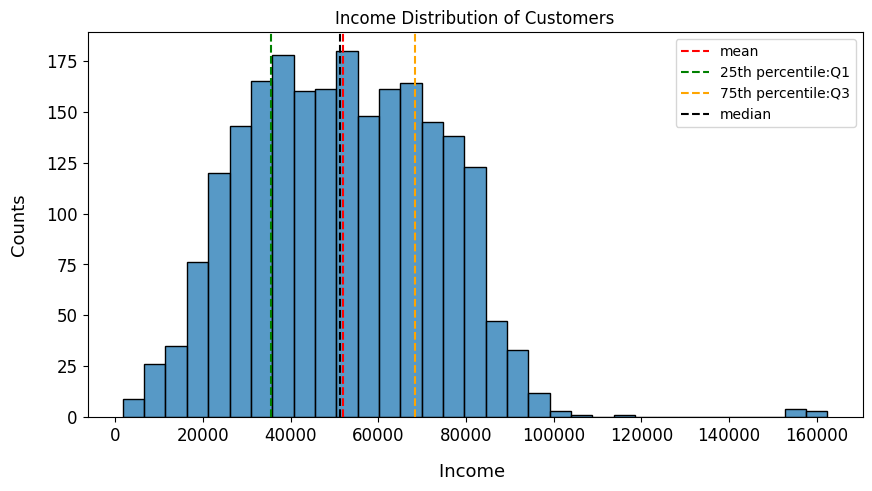

In [43]:
plt.figure(figsize=(10,5))
distr_of_age = sns.histplot(data = df, x = df['Income'])
distr_of_age.set(title = "Income Distribution of Customers");
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('Income ', fontsize=13, labelpad=13)
plt.ylabel('Counts', fontsize=13, labelpad=13)
plt.axvline(x=np.mean(df['Income']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['Income'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df['Income'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.axvline(x=np.median(df['Income']), c='black', ls='--', label='median')
plt.legend()
#skewed towards the right
# mean = 52247.25

Text(0.5, 1.0, 'Kid home')

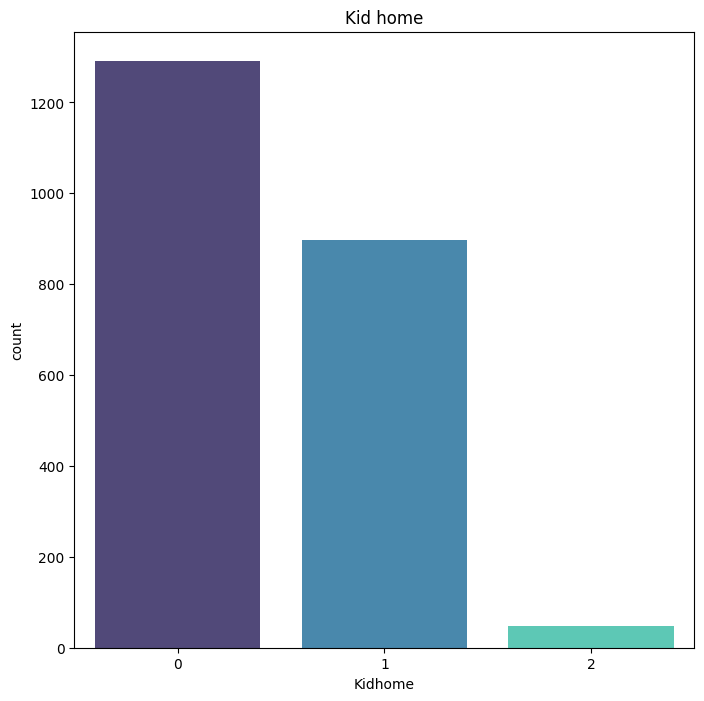

In [44]:
plt.figure(figsize=(8, 8))
ax = sns.countplot(data=df, x='Kidhome', saturation=1, alpha=0.9, palette='mako', order=df['Kidhome'].value_counts().index)
ax.set_title('Kid home')


Text(0.5, 1.0, 'Teen home')

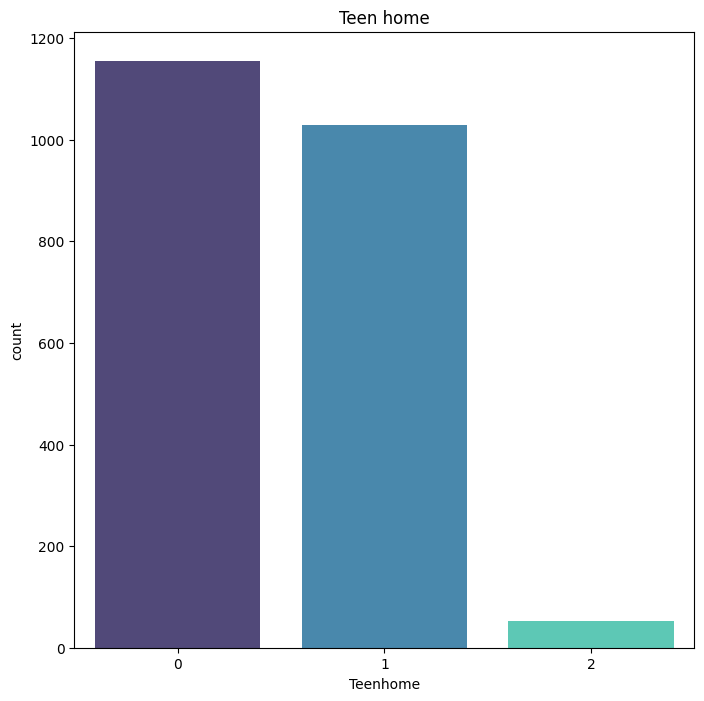

In [45]:
plt.figure(figsize=(8, 8))
ax = sns.countplot(data=df, x='Teenhome', saturation=1, alpha=0.9, palette='mako', order=df['Teenhome'].value_counts().index)
ax.set_title('Teen home')

In [46]:
df['Total_Spend'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [47]:
df['Total_Accept'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

In [48]:
df['Ratio_wine'] = round((df['MntWines'] / df['Total_Spend']),2)
df['Ratio_fruits'] = round((df['MntFruits'] / df['Total_Spend']),2)
df['Ratio_meat'] = round((df['MntMeatProducts'] / df['Total_Spend']),2)
df['Ratio_fish'] = round((df['MntFishProducts'] / df['Total_Spend']),2)
df['Ratio_sweet'] = round((df['MntSweetProducts'] / df['Total_Spend']),2)
df['Ratio_gold_prods'] = round((df['MntGoldProds'] / df['Total_Spend']),2)

In [49]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Age,Age Group,Total_Spend,Total_Accept,Ratio_wine,Ratio_fruits,Ratio_meat,Ratio_fish,Ratio_sweet,Ratio_gold_prods
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,57,Middle-Aged Adults,1617,1,0.39,0.05,0.34,0.11,0.05,0.05
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,60,Old Adults,27,0,0.41,0.04,0.22,0.07,0.04,0.22
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,49,Middle-Aged Adults,776,0,0.55,0.06,0.16,0.14,0.03,0.05
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,30,Young Adults,53,0,0.21,0.08,0.38,0.19,0.06,0.09
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,33,Young Adults,422,0,0.41,0.10,0.28,0.11,0.06,0.04


In [50]:
df['Complain'].value_counts()

0    2216
1      20
Name: Complain, dtype: int64

Text(0, 0.5, 'Days')

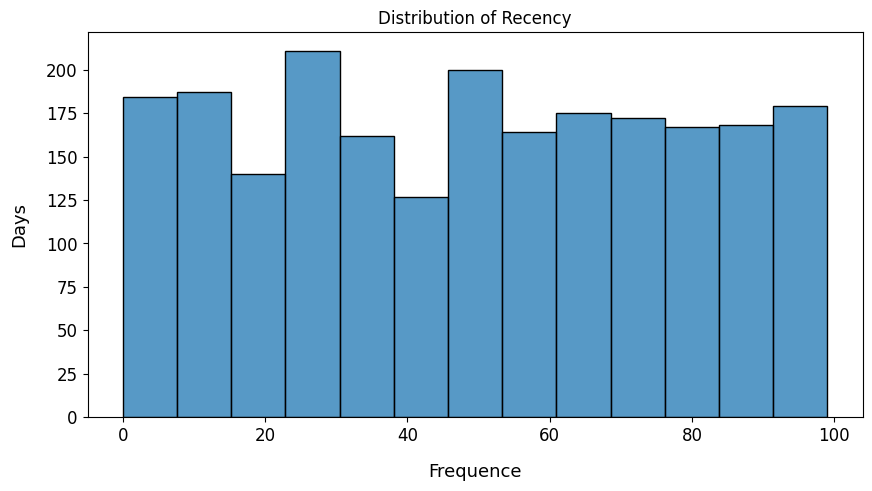

In [51]:
plt.figure(figsize=(10,5))
distr_of_age = sns.histplot(data = df, x = df['Recency'])
distr_of_age.set(title = "Distribution of Recency");
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('Frequence', fontsize=13, labelpad=13)
plt.ylabel('Days', fontsize=13, labelpad=13)

In [52]:
def recency_group(recency):
  if recency <= 30:
    return '0-30 days'
  elif recency > 30 and recency <= 60:
    return '30-60 days'
  elif recency > 60 and recency <= 90:
    return '60-90 days'
  else:
    return 'Over 90 days'

In [53]:
df['Recency Group'] = df['Recency'].apply(recency_group)

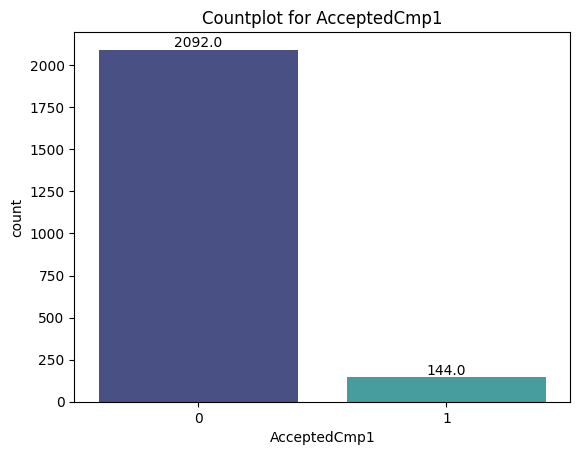

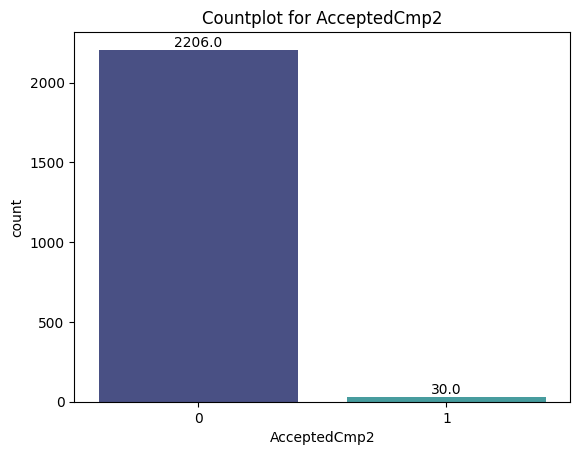

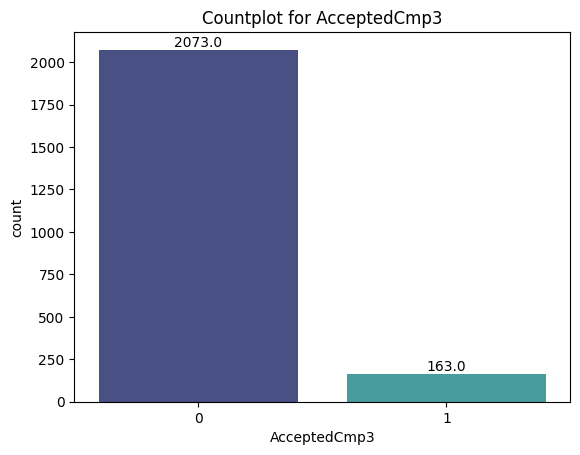

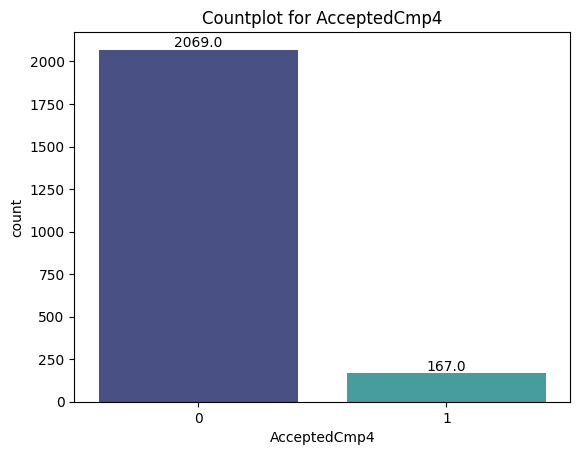

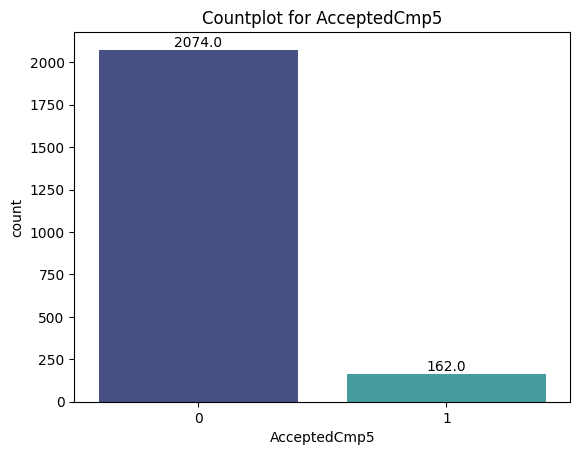

In [54]:
columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

for col in columns:
    ax = sns.countplot(data=df, x=col, palette = 'mako')
    
    # Add count values on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    plt.title(f'Countplot for {col}')
    plt.show()

The most successful marketing campaign or the campaign that most customers have accepted is Number 4

In [55]:
df['Total_Accept'].value_counts()

0    1628
1     369
2     142
3      51
4      36
5      10
Name: Total_Accept, dtype: int64

Text(0, 0.5, 'Count')

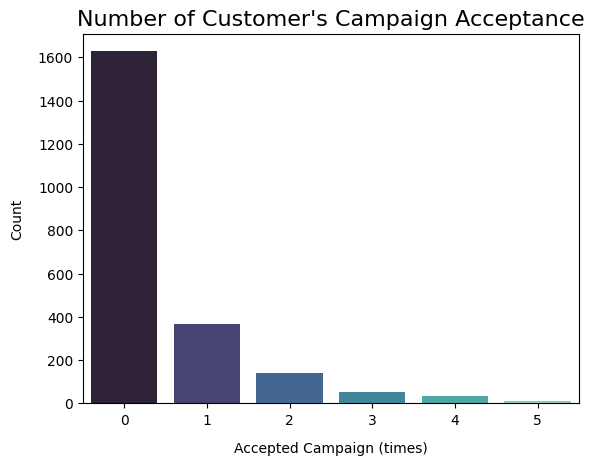

In [56]:
ax = sns.countplot(data=df, x='Total_Accept', palette='mako')
plt.title('Number of Customer\'s Campaign Acceptance',size=16)
plt.xlabel('Accepted Campaign (times)',labelpad=10)
plt.ylabel('Count',labelpad=10)


It can be concluded that most of the customers have no inclination to participate (accept) in marketing campaigns.

From the graph above it is known that:

The number of offers received from the campaign shows a change where the number of customers who received an offer once continued to decrease to the number of customers who received an offer 5 times.
This could mean that the campaigns that are running are not getting much attention from the customers as the number of campaigns that are running, the customer response keeps going down.

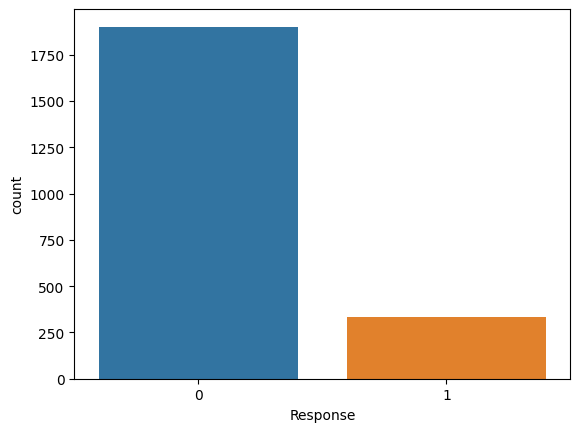

In [57]:
ax = sns.countplot(data=df, x= 'Response')

<Axes: xlabel='NumDealsPurchases', ylabel='count'>

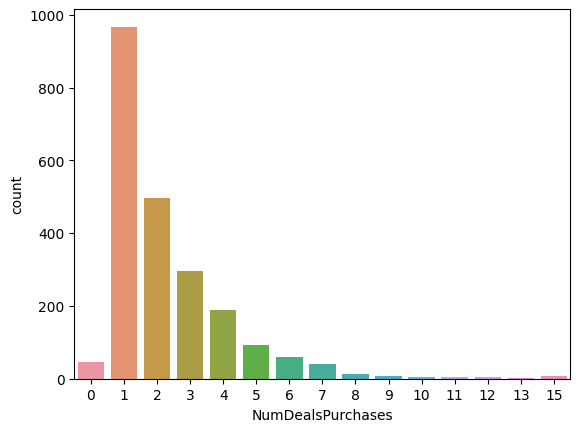

In [58]:
sns.countplot(data=df, x= 'NumDealsPurchases')

In [59]:
df['Frequency'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

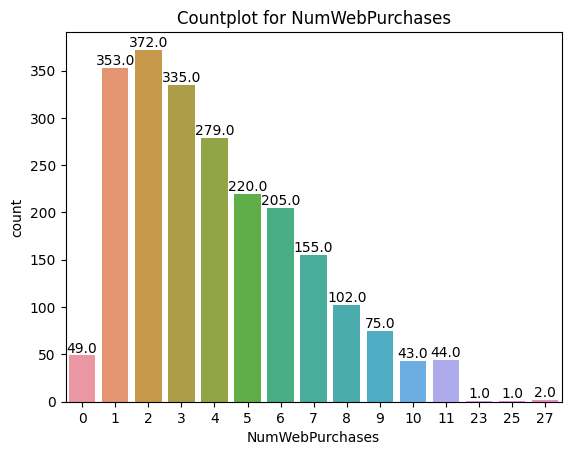

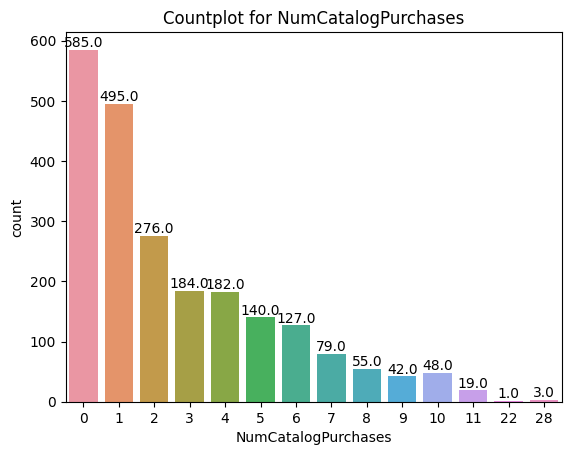

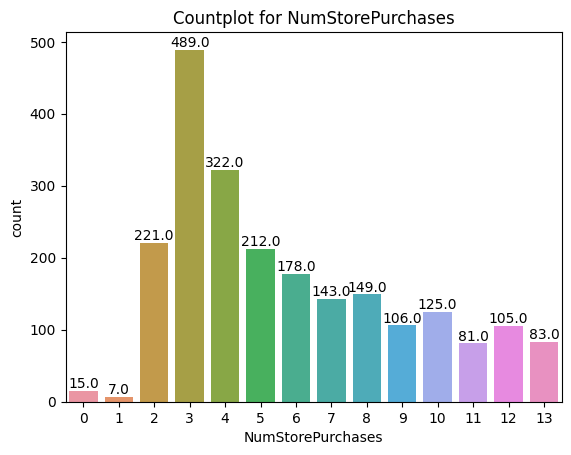

In [60]:
columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

for col in columns:
    ax = sns.countplot(data=df, x=col)
    
    # Add count values on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    plt.title(f'Countplot for {col}')
    plt.show()

In [61]:
df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].describe()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2236.000000,2236.000000,2236.000000
mean,4.087657,2.663238,5.795617
std,2.779988,2.923898,3.251129
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000
50%,4.000000,2.000000,5.000000
75%,6.000000,4.000000,8.000000
max,27.000000,28.000000,13.000000


In [62]:
# df_sources = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
# sources_dict = {'NumWebPurchases': 'Web',
#                  'NumCatalogPurchases': 'Catalog',
#                  'NumStorePurchases': 'Store'}

my_col = list(df.loc[:,['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].columns)

purchase_source = pd.DataFrame()
purchase_source['Source'] = ['Web','Catalog','Store']
purchase_source['Total_purchase'] = [df[i].sum() for i in my_col]
purchase_source


,Source,Total_purchase
0,Web,9140
1,Catalog,5955
2,Store,12959


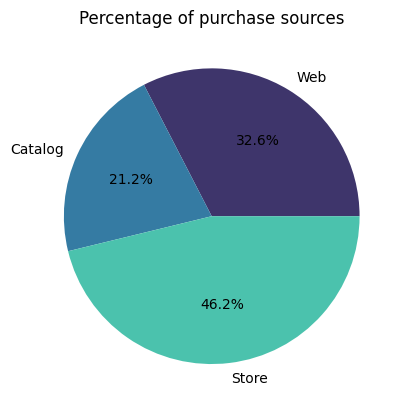

In [102]:
colors = sns.color_palette('mako', n_colors=len(purchase_source['Source'].value_counts()))
plt.pie(purchase_source['Total_purchase'], labels=purchase_source['Source'].value_counts().keys(),
        wedgeprops={'linewidth': 3}, autopct='%1.1f%%', colors=colors)
plt.title('Percentage of purchase sources')
plt.show()


The largest share of purchases are made through the physical store (46.2%), and the smallest share of purchases made through the catalog (21.2%).
Based on these percentages, a correlation test should be conducted,
to understand the relationship between or among some of the variables associated with purchases made through different channels.

<Axes: title={'center': 'Heatmap: Purchases by Purchases Source vs Other Variables'}>

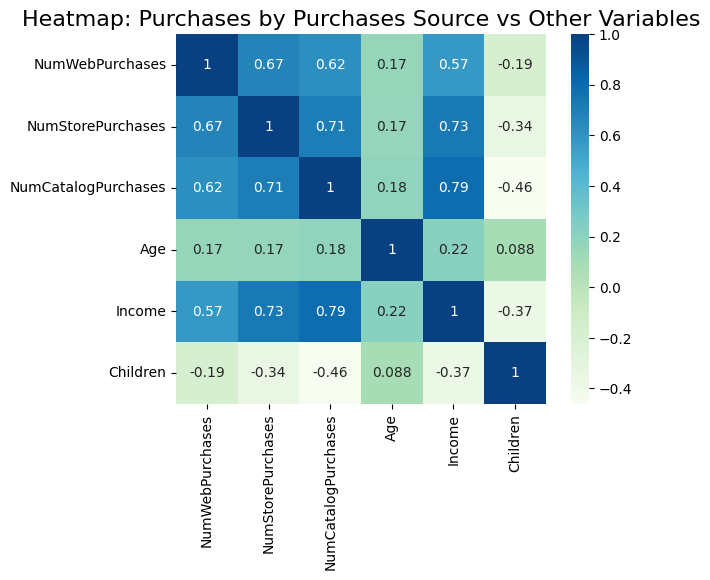

In [103]:
corr_1 = df[['NumWebPurchases','NumStorePurchases','NumCatalogPurchases','Age','Income','Children']].corr('spearman')

plt.title('Heatmap: Purchases by Purchases Source vs Other Variables', size=16)
sns.heatmap(corr_1, annot=True, cmap='GnBu', square=True)

**The results of Heat Map:**


*   The NumCatalogPurchases variable has the highest positive correlation with the income variable, which means that there is a strong relationship between these two variables.
That is, the higher the customer's income, the greater the number of purchases through the catalog.
The observation that higher customer income is associated with a greater number of purchases through the catalog can be explained by several factors:

   1. Affordability: Customers with higher incomes generally have more disposable 
income, which allows them to afford higher-priced items typically offered through catalogs. They may be more willing and able to spend on luxury or premium products available in catalogs.

   2. Targeted Marketing: Catalog purchases often target a specific demographic, including customers with higher incomes. Catalogs may feature upscale products, exclusive offers, or personalized recommendations tailored to customers with higher purchasing power. This targeted marketing strategy may appeal to customers with higher incomes, leading to a higher number of catalog purchases.

   3. Convenience and Variety: Catalogs offer the convenience of browsing a wide range of products from the comfort of one's home. Customers with higher incomes may value the convenience factor and appreciate the ability to explore a diverse selection of products offered through catalogs. This convenience, combined with a larger disposable income, can contribute to a higher frequency of catalog purchases.

   4. Exclusivity and Unique Products: Catalogs often showcase unique or limited-edition items that may not be available through other purchasing channels. Customers with higher incomes may be attracted to these exclusive offerings and perceive them as status symbols or luxury purchases. As a result, they are more likely to make catalog purchases to acquire these exclusive or unique products.

It's important to note that while there may be a correlation between higher customer income and a greater number of purchases through the catalog, individual preferences and behaviors can vary. Not all customers with higher incomes will necessarily have a higher catalog purchase frequency, as factors like personal preferences, needs, and spending habits can influence purchasing decisions.







*  The observation that the variable "NumCatalogPurchases" has the largest negative correlation with the variable "children" implies that as the number of children increases, the number of catalog purchases tends to decrease. This negative correlation can be attributed to several factors:

   1. Time and Priorities: Raising children typically requires a significant amount of time and attention. Parents with more children may have less discretionary time available for activities such as browsing catalogs and making purchases. The demands of parenting may result in a decreased focus on catalog shopping.

   2. Financial Constraints: Having more children often comes with increased financial responsibilities. Parents may need to allocate a larger portion of their income towards childcare, education, and other family-related expenses. This allocation of resources towards children's needs may limit the available budget for discretionary spending on catalog purchases.

   3. Shift in Spending Priorities: Parents may prioritize spending on essential items for their children, such as clothing, education, healthcare, and other necessities. As a result, they may reduce their discretionary spending on non-essential items like catalog purchases. The financial resources that could have been allocated to catalog purchases are redirected towards fulfilling the needs and wants of their children.

   4. Lifestyle Changes: The presence of children often brings about changes in lifestyle and purchasing patterns. Parents may shift their focus towards purchasing items that are specifically targeted for children, such as toys, books, and child-related products. This shift in spending priorities may lead to a decrease in catalog purchases for items unrelated to children.

It's important to note that correlation does not imply causation, and individual preferences and circumstances can vary. While a negative correlation between "NumCatalogPurchases" and "children" may exist at a general level, there can be exceptions and variations among different individuals and families. Other factors, such as income, age, geographic location, and personal preferences, can also influence the relationship between catalog purchases and the number of children.




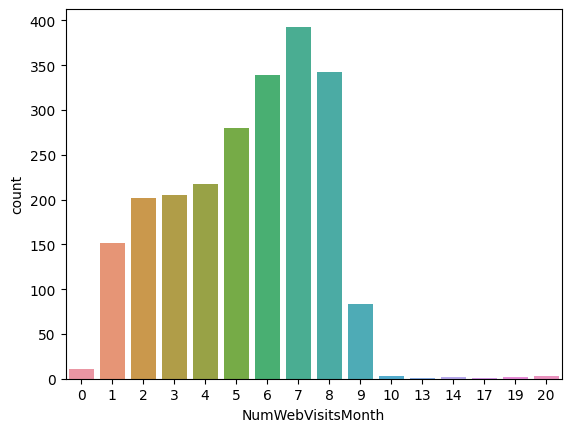

In [64]:
ax = sns.countplot(data=df, x= 'NumWebVisitsMonth')

**Feature Engineering**

In [65]:
education_dictionary = {'Graduation': 'Higher Education',
                        'PhD': 'Higher Education',
                        'Basic': 'Basic Education',
                        '2n Cycle': 'Basic Education',
                        'Master': 'Higher Education'}

In [66]:
df['Education'] = df['Education'].replace(to_replace = education_dictionary)

In [67]:
df['Education'].value_counts()

Higher Education    1981
Basic Education      255
Name: Education, dtype: int64

<Figure size 500x800 with 0 Axes>

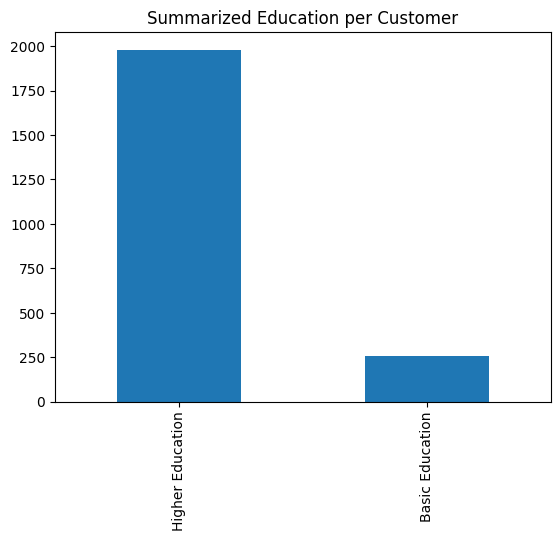

<Figure size 500x800 with 0 Axes>

In [68]:
df['Education'].value_counts().plot(kind='bar',linewidth = 3)
plt.title('Summarized Education per Customer')
plt.figure(figsize=(5,8))

In [69]:
marital_status_dictionary = {'Single': 'No Relationship',
                             'Together': 'In Relationship',
                             'Married': 'In Relationship',
                             'Divorced': 'No Relationship',
                             'Widow': 'No Relationship',
                             'Alone': 'No Relationship',
                             'Absurd': 'No Relationship',
                             'YOLO': 'No Relationship'}

<Figure size 500x800 with 0 Axes>

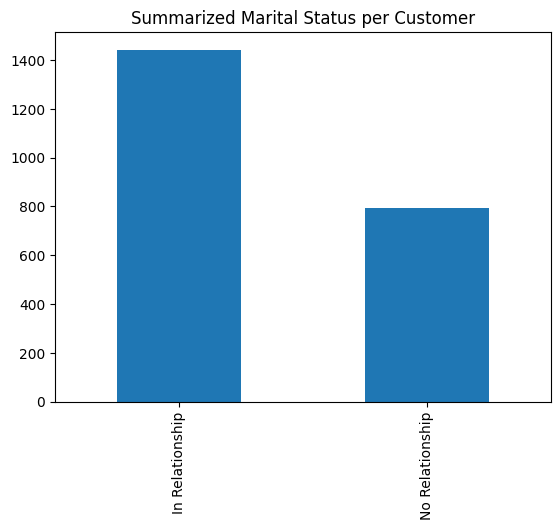

<Figure size 500x800 with 0 Axes>

In [70]:
df['Marital_Status'] = df['Marital_Status'].replace(to_replace = marital_status_dictionary)
df['Marital_Status'].value_counts()
df['Marital_Status'].value_counts().plot(kind='bar',linewidth = 3)
plt.title('Summarized Marital Status per Customer')
plt.figure(figsize=(5,8))

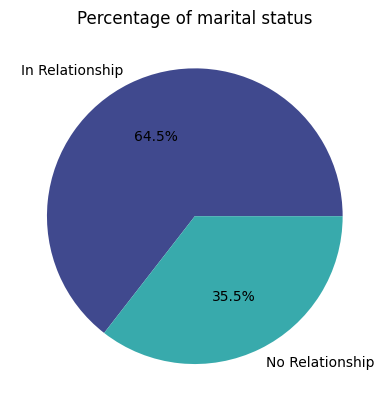

In [71]:
colors = sns.color_palette('mako', n_colors=len(df['Marital_Status'].value_counts()))
plt.pie(df['Marital_Status'].value_counts(), labels=df['Marital_Status'].value_counts().keys(), autopct='%1.1f%%',
        wedgeprops={'linewidth': 3}, colors=colors)
plt.title('Percentage of marital status')
plt.show()

In [72]:
df['Children'] = df['Kidhome'] + df['Teenhome']

Text(0, 0.5, 'Spendings')

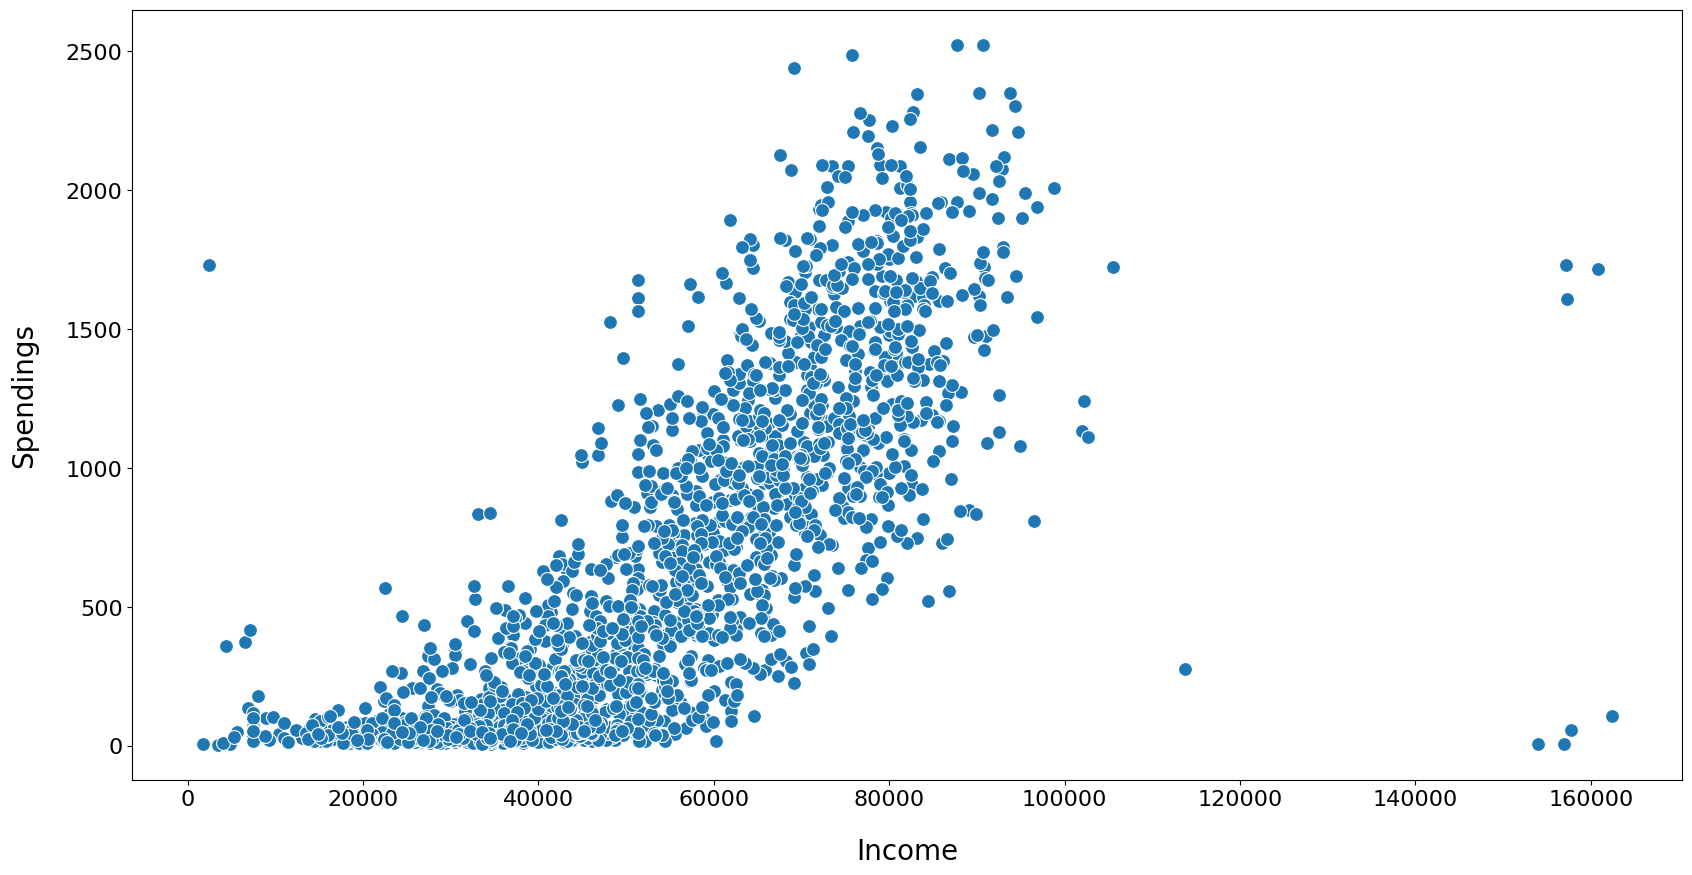

In [73]:
plt.figure(figsize=(20,10))


sns.scatterplot(data = df, x='Income', y='Total_Spend', s=100)

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20)

The relationship is linear. Customers who have higher salaries, spend more

Text(0, 0.5, 'Spendings')

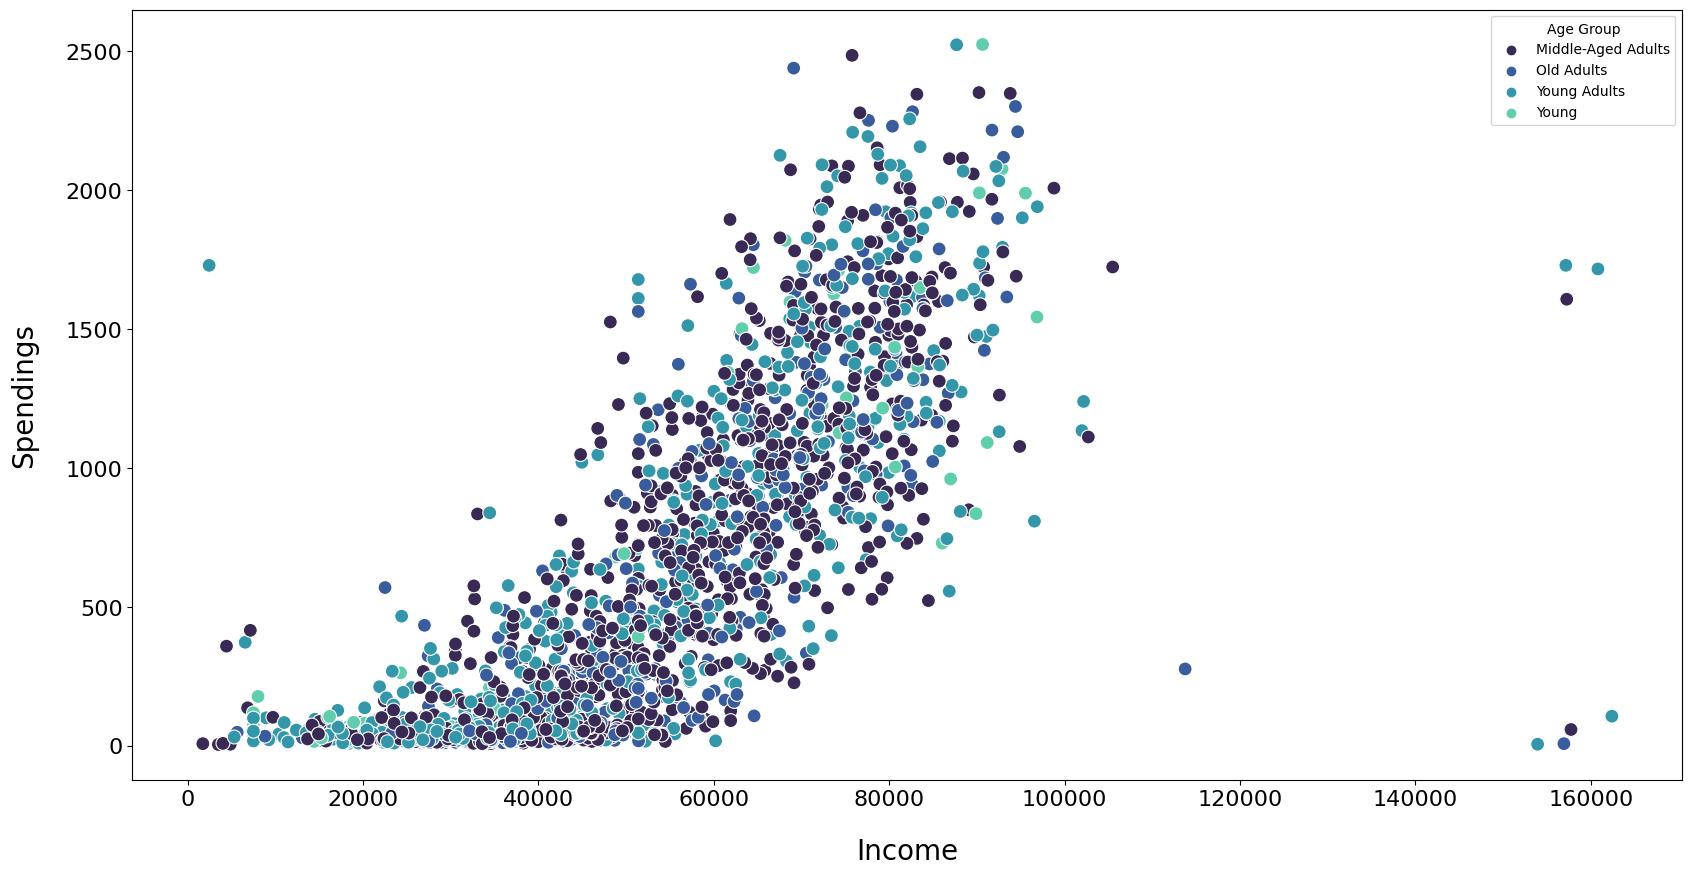

In [74]:
plt.figure(figsize=(20,10))


sns.scatterplot(data = df, x='Income', y='Total_Spend', hue = 'Age Group', s=100, palette = 'mako')

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20)

Text(0, 0.5, 'Spending')

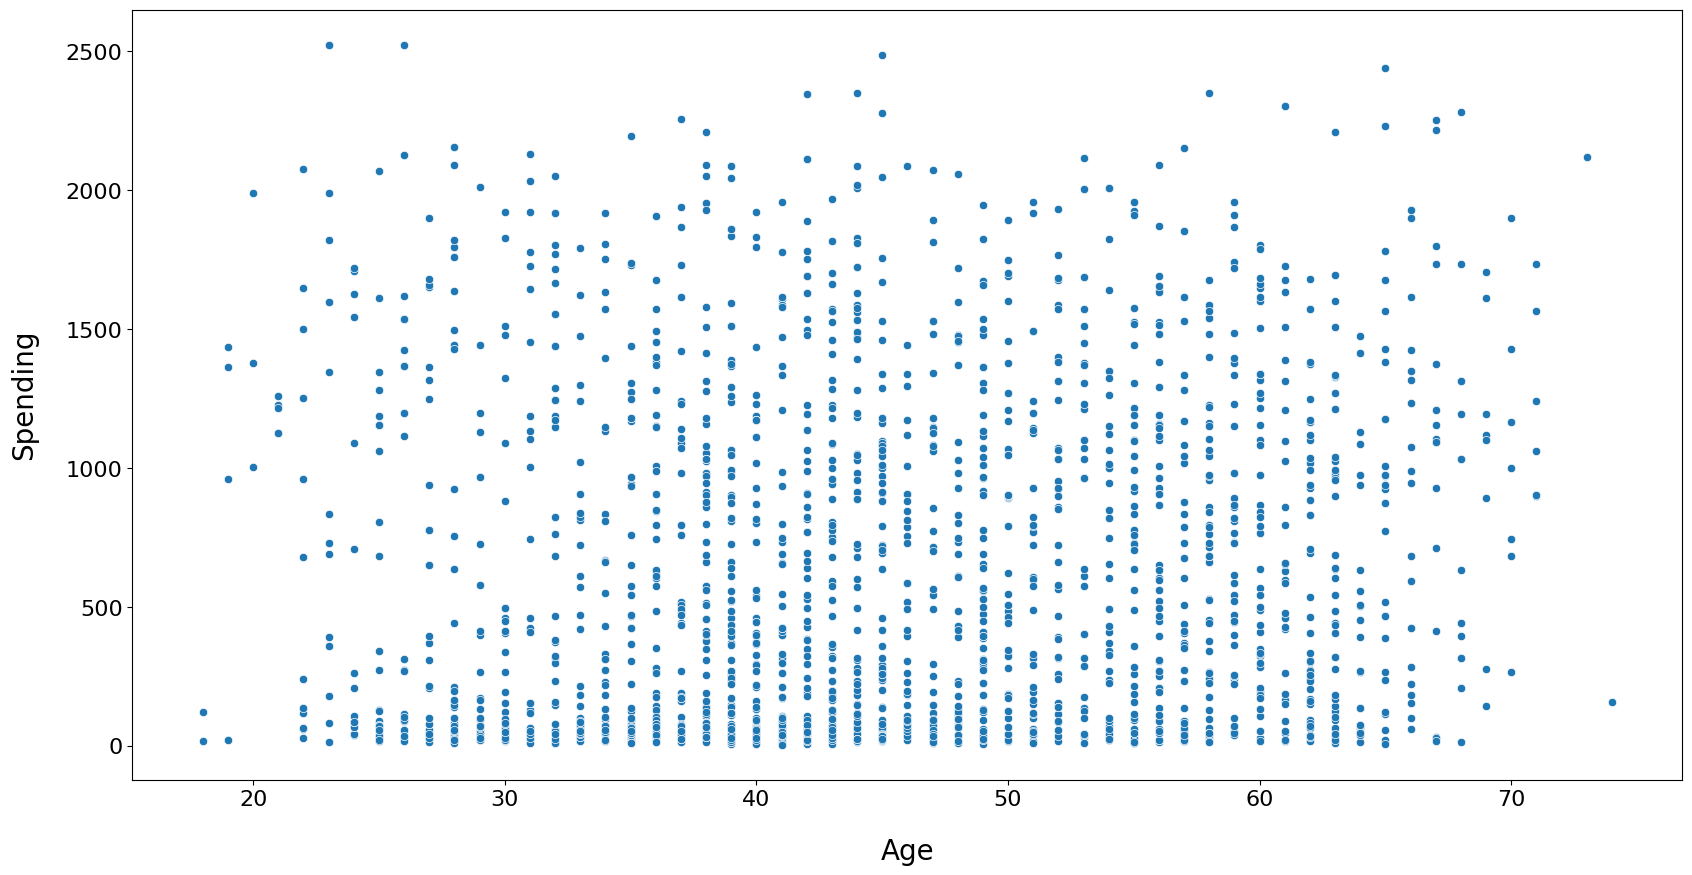

In [75]:
plt.figure(figsize=(20,10))
sns.scatterplot(data = df, x='Age', y='Total_Spend')

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age', fontsize=20, labelpad=20)
plt.ylabel('Spending', fontsize=20, labelpad=20)

There does not appear to be a clear relationship between the ages of customers and their shopping habits.

<ipython-input-76-6f9393c82e39>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data = df, x = 'Kidhome' , y = 'Total_Spend', palette = 'mako', ci = 0)


<Axes: xlabel='Kidhome', ylabel='Total_Spend'>

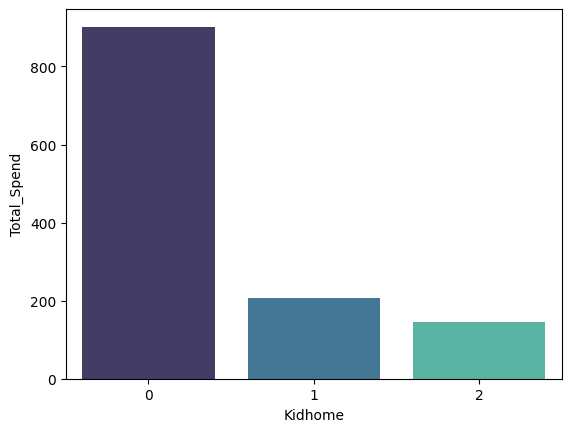

In [76]:
sns.barplot(data = df, x = 'Kidhome' , y = 'Total_Spend', palette = 'mako', ci = 0)

<ipython-input-77-cd203a3e2928>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data = df, x = 'Teenhome' , y = 'Total_Spend', palette = 'mako', ci = 0)


<Axes: xlabel='Teenhome', ylabel='Total_Spend'>

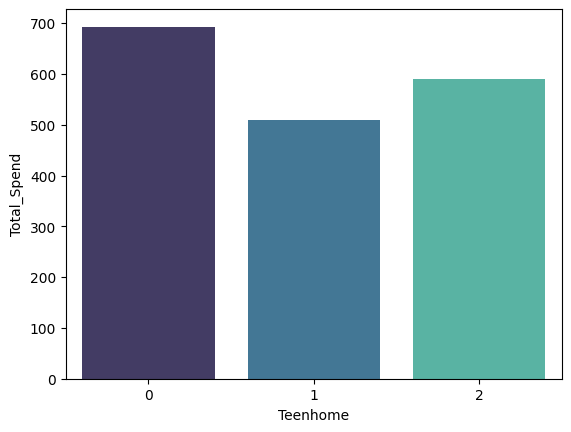

In [77]:
sns.barplot(data = df, x = 'Teenhome' , y = 'Total_Spend', palette = 'mako', ci = 0)

<ipython-input-78-7ab5d5ada2e3>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  a2 = sns.barplot(data=df, y='Total_Spend', x= 'Children', palette='mako', estimator=sum, ci = 0)


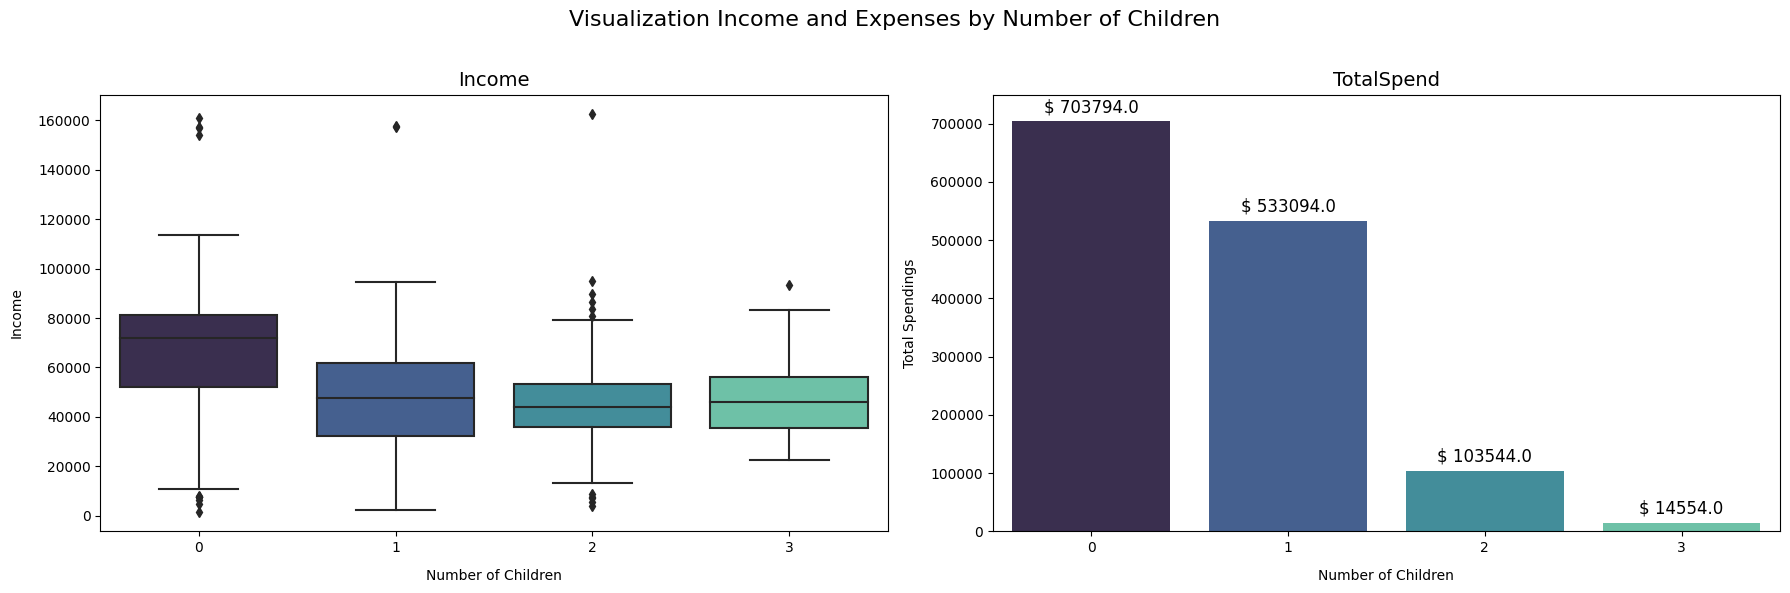

In [78]:
fig = plt.figure(figsize=(18,6))

fig.suptitle('Visualization Income and Expenses by Number of Children\n', size=16)

plt.subplot(1,2,1)
sns.boxplot(data=df, y='Income', x= 'Children', palette='mako')
plt.title('Income', size=14)
plt.xlabel('Number of Children',labelpad=10)
plt.ylabel('Income',labelpad=10)

plt.subplot(1,2,2)
a2 = sns.barplot(data=df, y='Total_Spend', x= 'Children', palette='mako', estimator=sum, ci = 0)
plt.title('TotalSpend', size=14)
plt.xlabel('Number of Children',labelpad=10)
plt.ylabel('Total Spendings',labelpad=10)
plt.ylim(0,750000)
for p in a2.patches:
    a2.annotate(f'$ {p.get_height()}', (p.get_x()+0.4, p.get_height()+40000), ha='center', va='top', color='black', size=12)

plt.tight_layout()

From the data above, it can be interpreted that customers who do not have children have a higher spend, which is normal because they do not need children yet compared to customers who have 2 to 3 children.
There are clients who have more than one child, but also have higher incomes compared to other clients with children.

In [79]:
df.groupby(['Marital_Status']).sum()[['Total_Spend']]

<ipython-input-79-3ea891a6a62e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Marital_Status']).sum()[['Total_Spend']]


,Total_Spend
Marital_Status,
In Relationship,861403
No Relationship,493583


In [80]:
df.groupby(['Marital_Status']).median()[['Income']]

<ipython-input-80-e1939abfac7d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Marital_Status']).median()[['Income']]


,Income
Marital_Status,
In Relationship,51381.50
No Relationship,51315.75


<ipython-input-81-047fd0d8eec0>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  a2 = sns.barplot(data=df, y='Total_Spend', x= 'Marital_Status', palette='mako', estimator=sum, ci = 0)


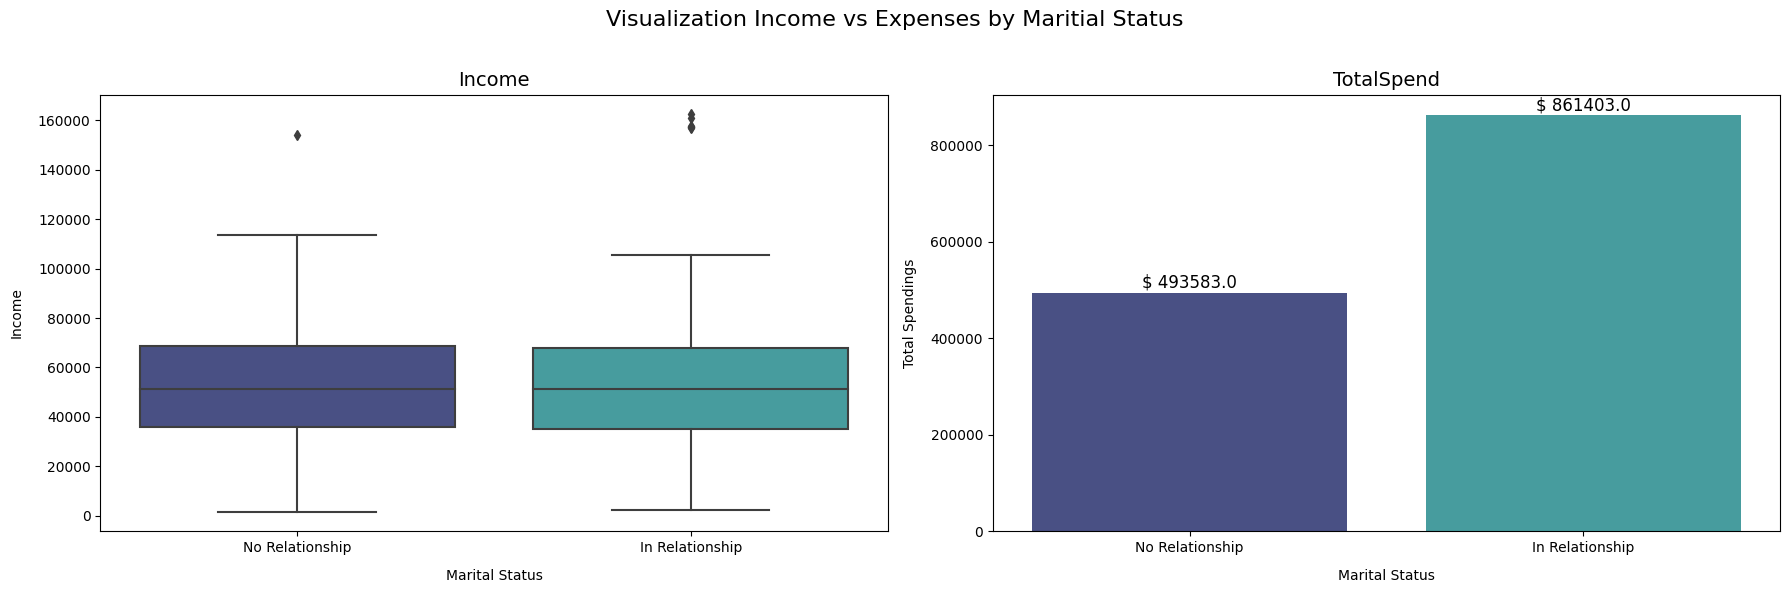

In [81]:
fig = plt.figure(figsize=(18,6))

fig.suptitle('Visualization Income vs Expenses by Maritial Status\n', size=16)

plt.subplot(1,2,1)
sns.boxplot(data=df, y='Income', x= 'Marital_Status', palette='mako')
plt.title('Income', size=14)
plt.xlabel('Marital Status',labelpad=10)
plt.ylabel('Income',labelpad=10)

plt.subplot(1,2,2)
a2 = sns.barplot(data=df, y='Total_Spend', x= 'Marital_Status', palette='mako', estimator=sum, ci = 0)
plt.title('TotalSpend', size=14)
plt.xlabel('Marital Status',labelpad=10)
plt.ylabel('Total Spendings',labelpad=10)

for p in a2.patches:
    a2.annotate(f'$ {p.get_height()}', (p.get_x()+0.4, p.get_height()+40000), ha='center', va='top', color='black', size=12)

plt.tight_layout()

In the two groups of marital status, namely in a relationship and not in a relationship, several deviations in incomes are observed, but for average incomes no differences are observed in the two groups.
It can be seen that the In Connection group is the group with the highest purchasing power. This is consistent with the large proportion of the number of customers based on marital_status, where the married group is the largest group of customers than the other groups, namely 64.5% of the total population.

In [82]:
products = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
products_dict = {'MntWines': 'Wine',
                 'MntFruits': 'Fruits',
                 'MntMeatProducts': 'Meat',
                 'MntFishProducts': 'Fish',
                 'MntSweetProducts': 'Sweet',
                 'MntGoldProds': 'Gold'}

# Replace column names
products = products.rename(columns=products_dict)


Text(0, 0.5, 'Average Spend')

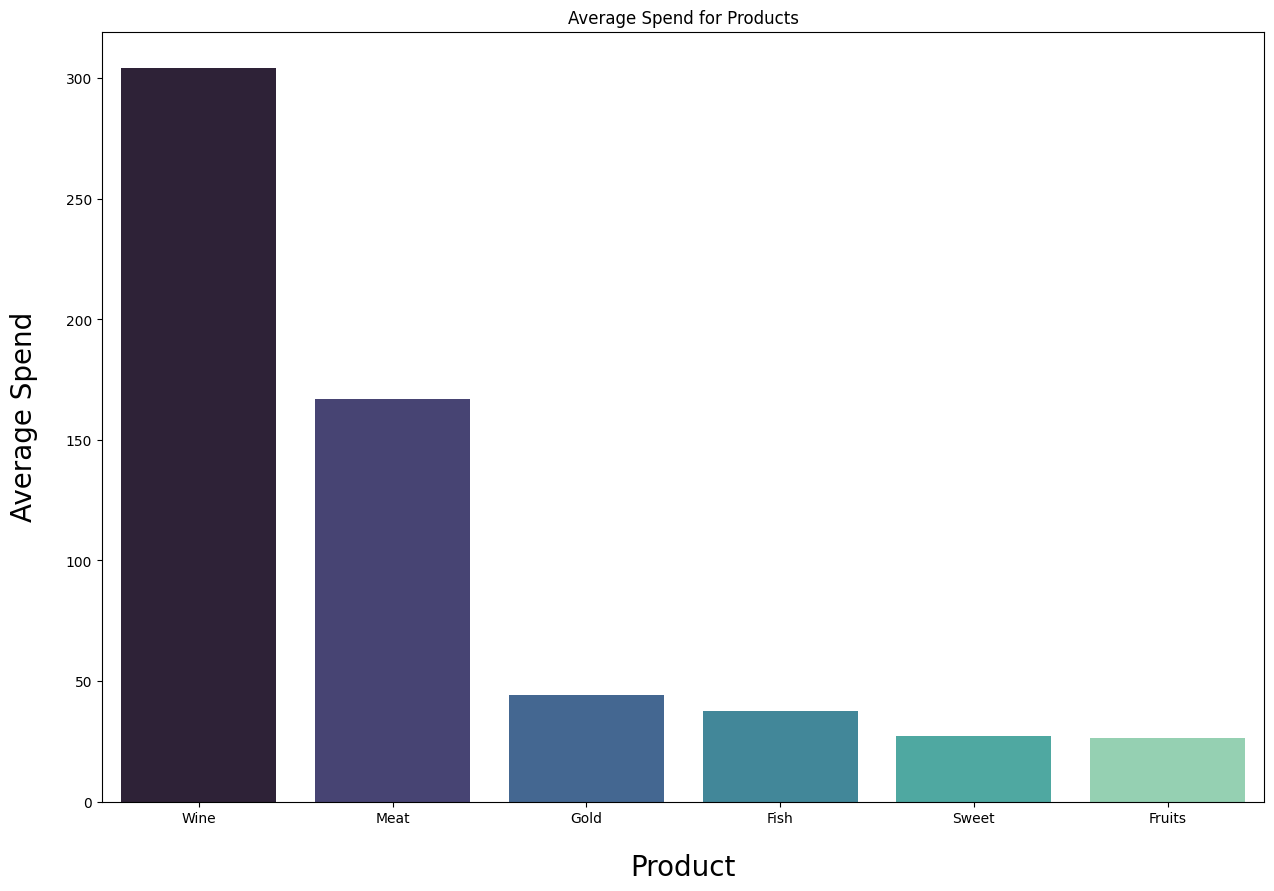

In [83]:
products_mean = products.mean(axis=0).sort_values(ascending=False)
products_mean_df = pd.DataFrame(list(products_mean.items()), columns=['Product', 'Average Spend'])

plt.figure(figsize=(15,10))
plt.title('Average Spend for Products')
sns.barplot(data=products_mean_df, x='Product', y='Average Spend', palette='mako');
plt.xlabel('Product', fontsize=20, labelpad=20)
plt.ylabel('Average Spend', fontsize=20, labelpad=20)

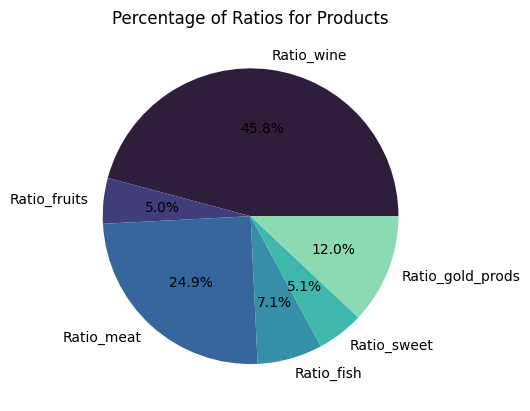

In [94]:
ratio_columns = ['Ratio_wine', 'Ratio_fruits', 'Ratio_meat', 'Ratio_fish', 'Ratio_sweet', 'Ratio_gold_prods']

colors = sns.color_palette('mako', n_colors=len(ratio_columns))
plt.pie(df[ratio_columns].sum(), labels=ratio_columns, autopct='%1.1f%%',
        wedgeprops={'linewidth': 3}, colors=colors)
plt.title('Percentage of Ratios for Products')
plt.show()

In [84]:
pivot_table = pd.pivot_table(data = df,  values = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], index = 'Age Group', aggfunc = np.sum)

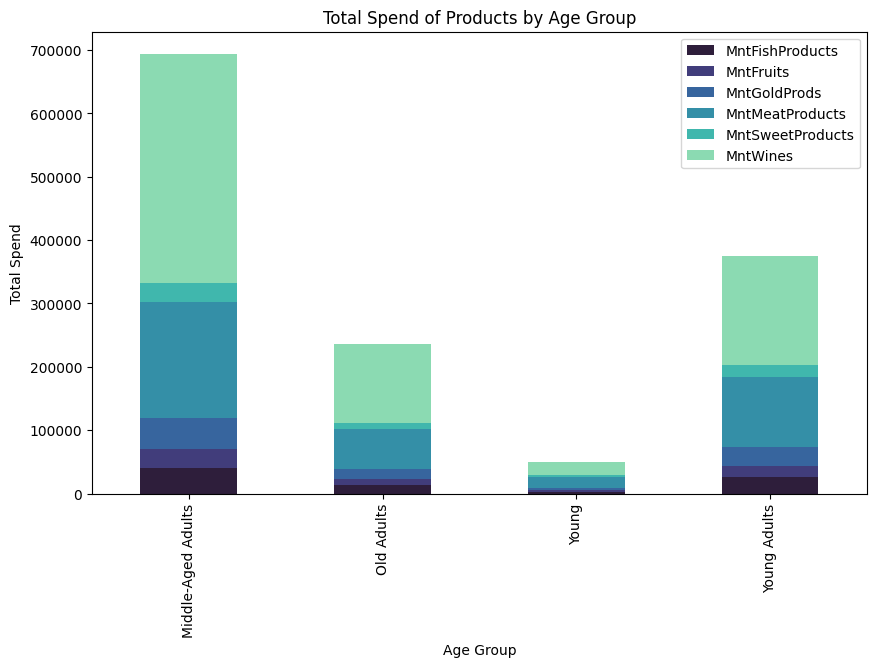

In [85]:
colors = sns.color_palette('mako', n_colors=len(pivot_table.columns))
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

plt.xlabel('Age Group')
plt.ylabel('Total Spend')
plt.title('Total Spend of Products by Age Group')

# Show the plot
plt.show()

In [86]:
pivot_table

,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines
Age Group,,,,,,
Middle-Aged Adults,40522,29343,49407,182810,29554,362587
Old Adults,14136,8751,16383,62534,9720,125263
Young,3245,2360,3608,17752,2161,20319
Young Adults,26028,18299,28948,110279,19117,171860


From the analysis, it should be concluded that customers under the age of 25 spend more on meat products.
Wine products are mostly bought by older customers and middle-aged adults, taking a major share of their spending.
The explanation of the data above is that the price of wine is generally more expensive than the price of other products.

Text(0, 0.5, 'Spendings')

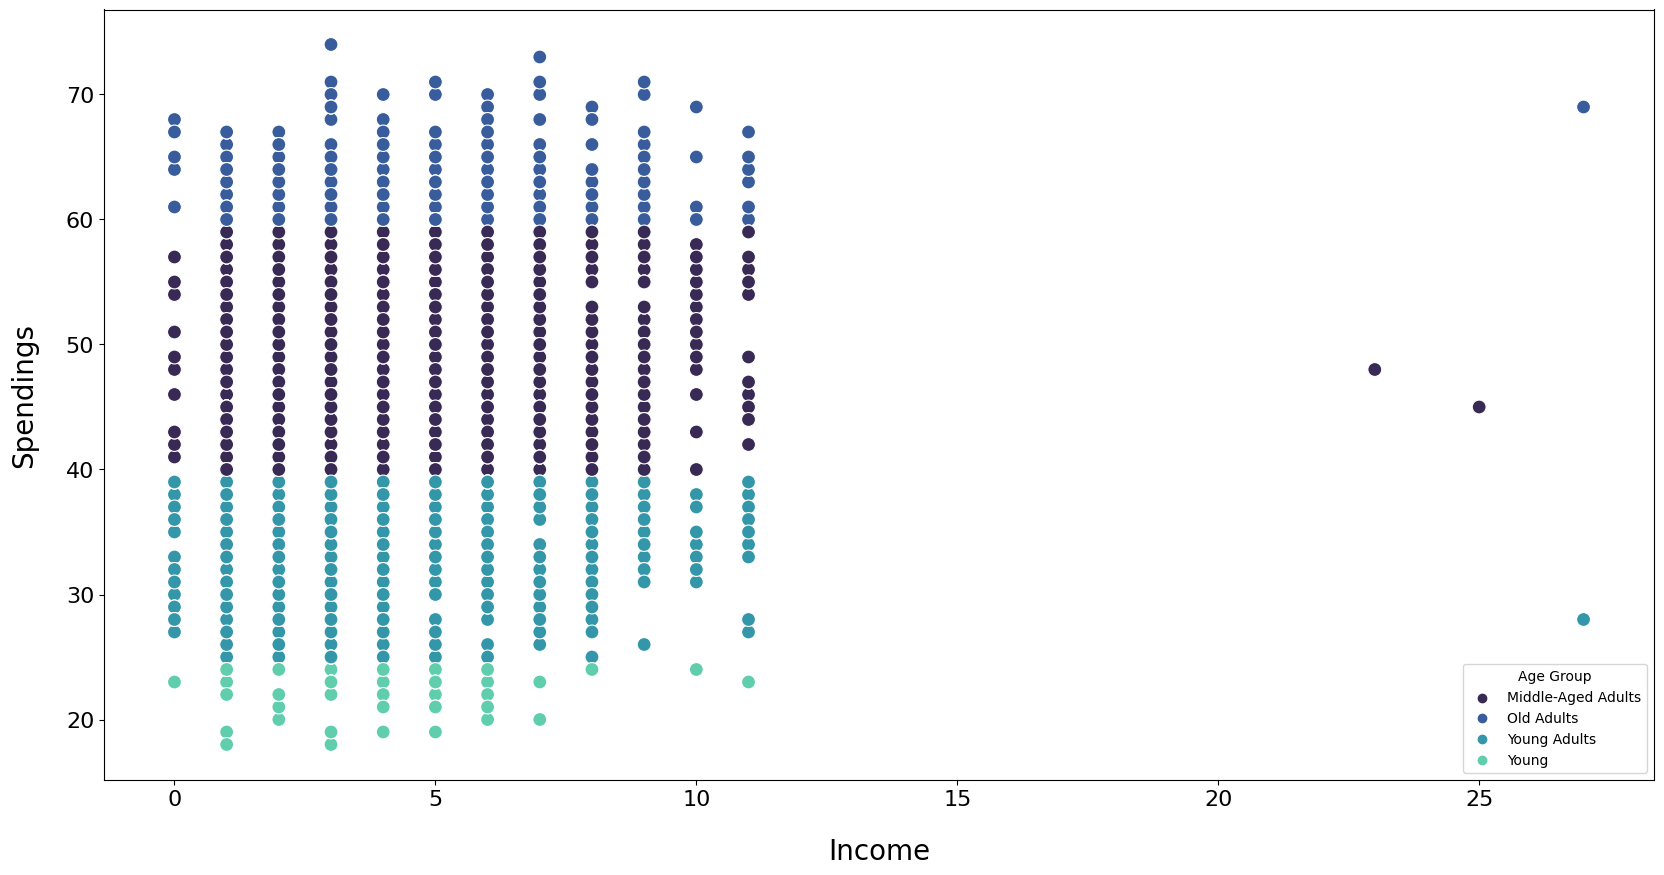

In [87]:
plt.figure(figsize=(20,10))


sns.scatterplot(data = df, x='NumWebPurchases', y='Age', hue = 'Age Group', s=100, palette = 'mako')

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20)

<ipython-input-88-0ff6c53945fe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(np.round(df.corr(),2), annot=True)


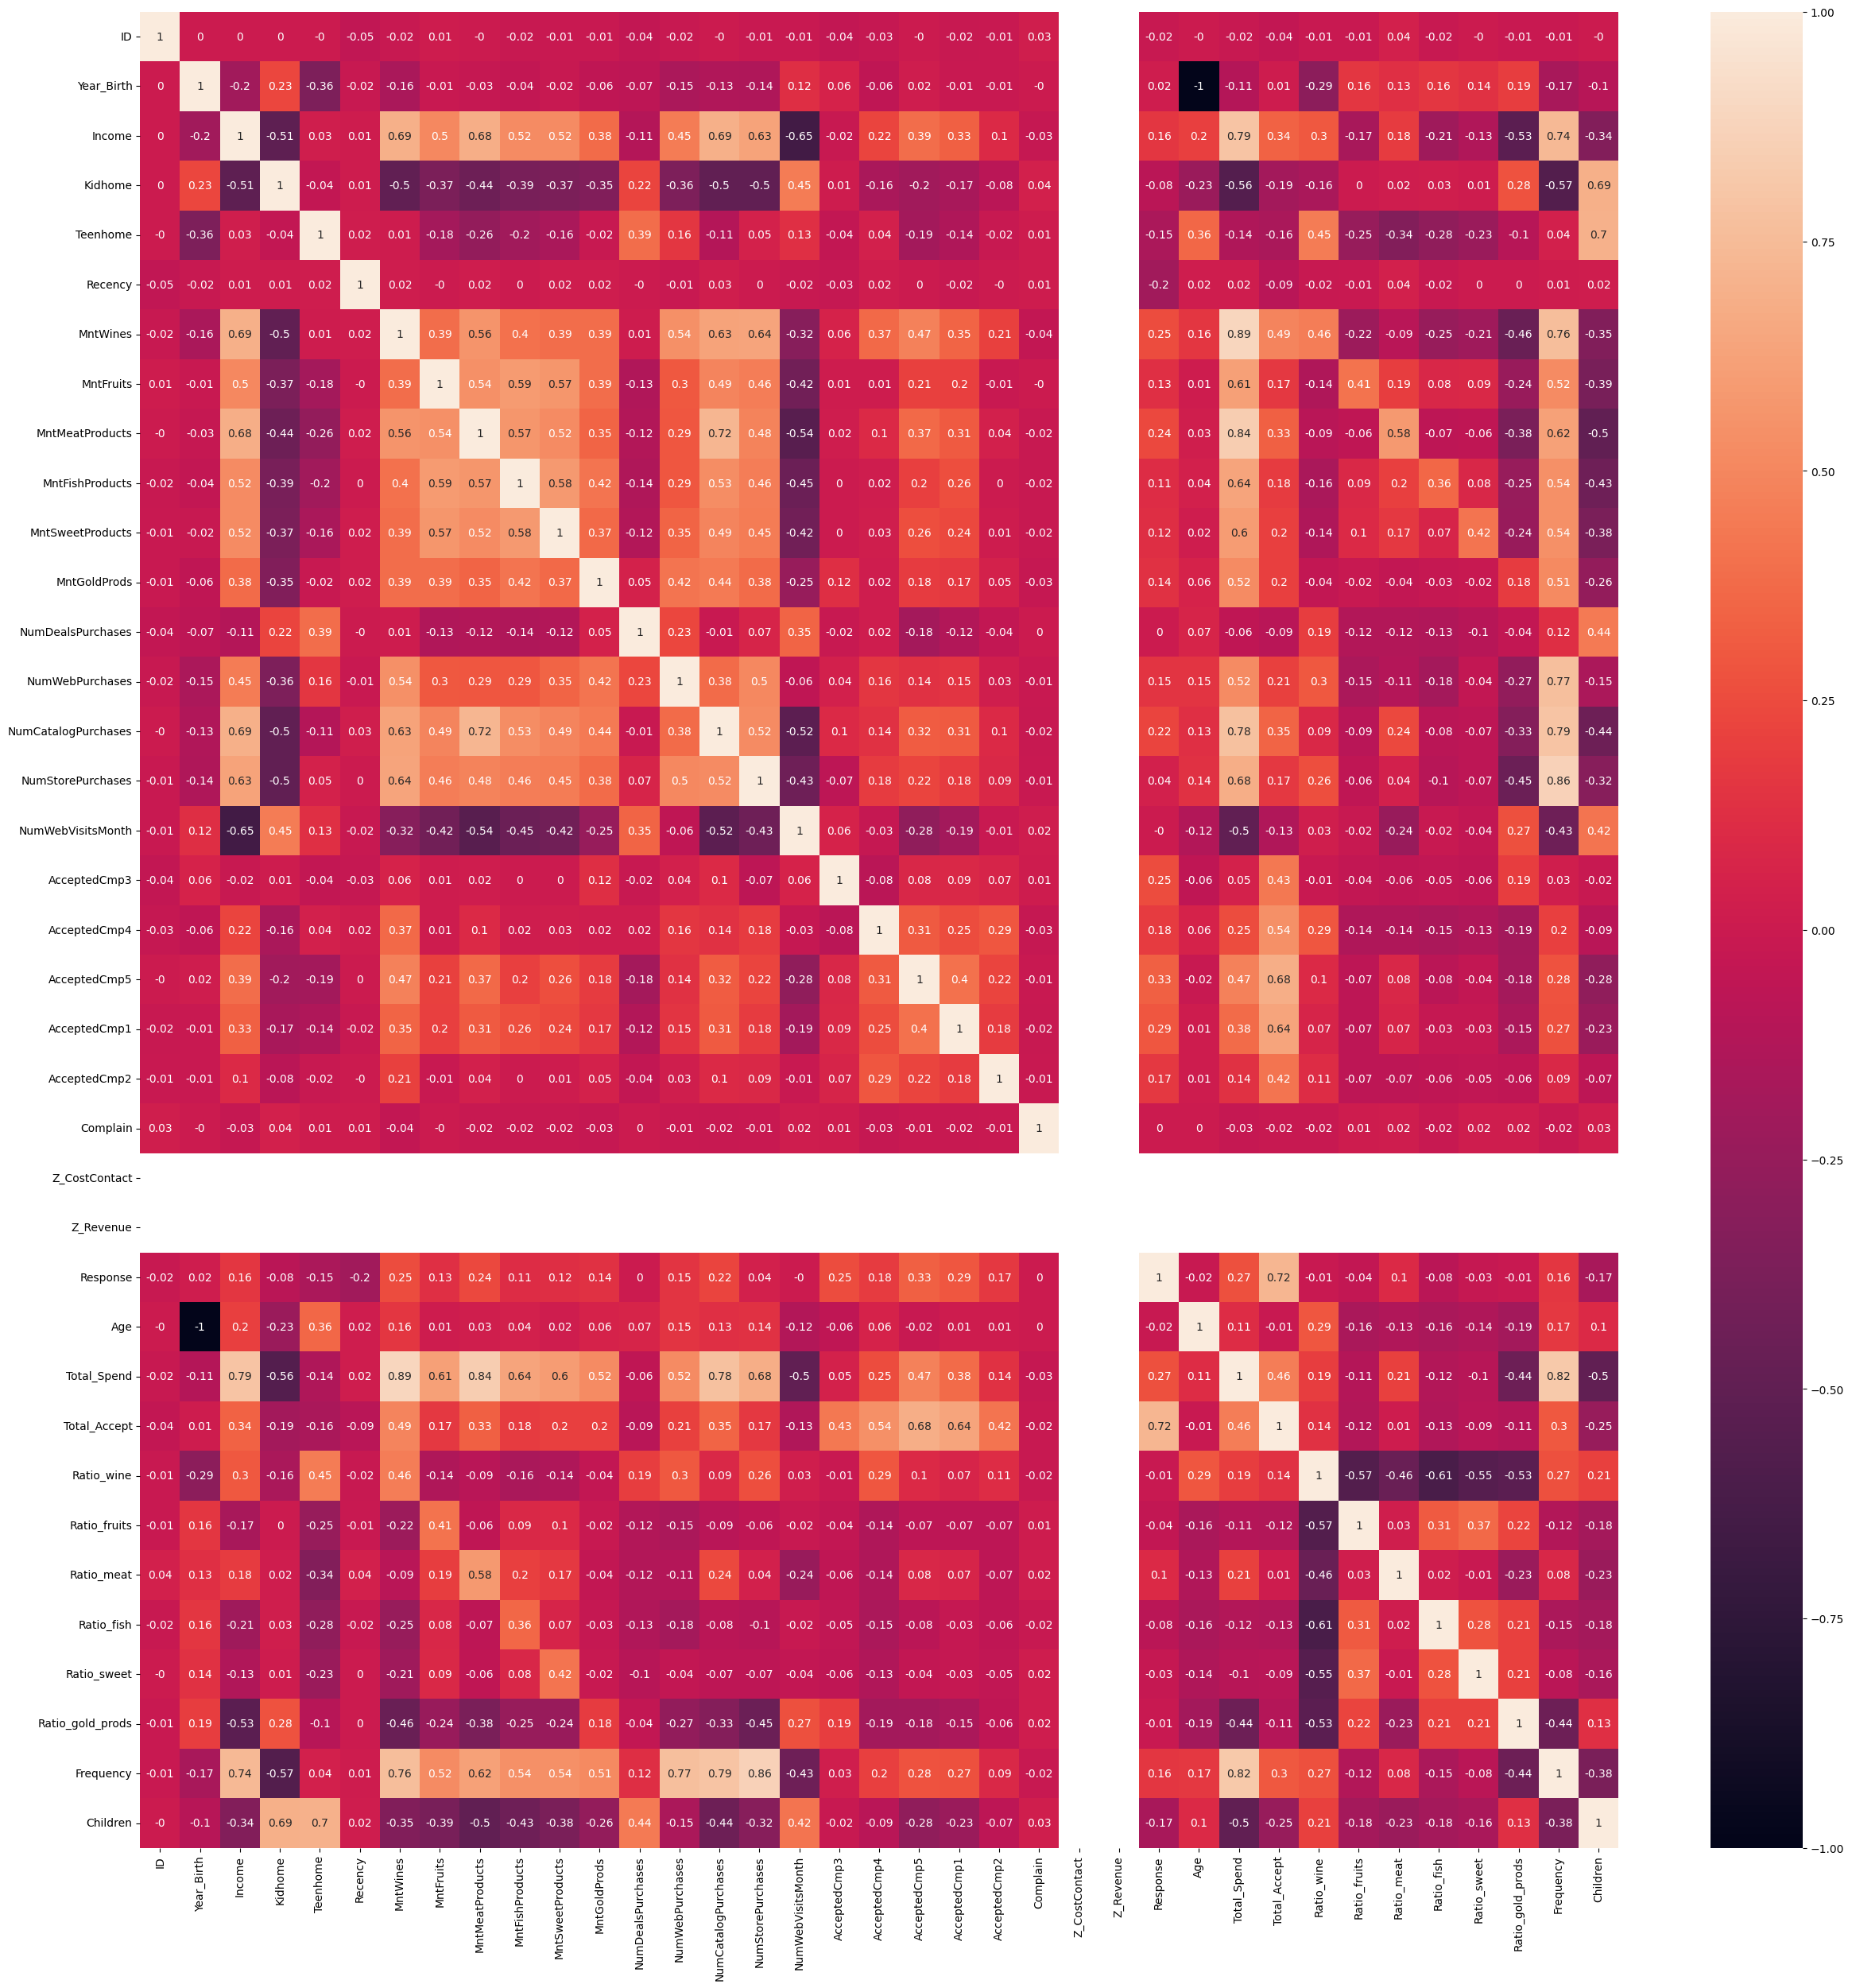

In [88]:
plt.figure(figsize=(30,30))
sns.heatmap(np.round(df.corr(),2), annot=True) 
plt.show()